# Cyber Bullying Detection on Twitter Dataset 🤬

**Team Name**: The Predictive Squad

**Team Members**: Vedant Dave (202418014), Kashish Patel (202418044), Sujal Dhrangdhariya (202418017), Jatin Sindhi (202418055)


## Introduction
In today's digital age, social media platforms have become a prominent place for communication and expression. However, the rise of these platforms has also led to an alarming increase in cyberbullying incident. This project aims to tackle this pressing issue by analyzing a dataset containing over 47k tweets labeled according to various classes of cyberbullying.

The primary objective of this project is to develop classification models that can automatically identify and flag potentially harmful tweets, thereby contributing to a safer online environment. By breaking down the patterns of hatred and discrimination found in these tweets, we hope to gain insights that can inform strategies to mitigate cyberbullying.

The dataset comprises tweets categorized into several types of cyberbullying, including ageism, ethnic discrimination, gender-based attacks, and religious intolerance, as well as tweets that do not fall under these categories. Each category contains approximately 8,000 samples, ensuring a balanced dataset for effective model training.

Throughout this notebook, we will perform various analyses, including exploratory data analysis (EDA), data visualization, and the development of classification models. We will evaluate the models using key performance metrics such as accuracy, precision, recall, and F1 score. Ultimately, this project seeks to shed light on the patterns of cyberbullying on social media and pave the way for future advancements in detection techniques.

## About Dataset

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

*   Age
*   Ethnicity
*   Gender
*   Religion
*   Other type of cyberbullying
*   Not cyberbullying

The data has been balanced in order to contain ~8000 of each class.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# import cufflinks
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')

In [4]:
# Loading our dataset
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
# dataset doesn't have any null values
print(df.notnull().count())

tweet_text            47692
cyberbullying_type    47692
dtype: int64


In [6]:
print("Dataset Shape: ",df.shape)

Dataset Shape:  (47692, 2)


In [7]:
print("Dataset Columns: ", df.columns)

Dataset Columns:  Index(['tweet_text', 'cyberbullying_type'], dtype='object')


In [8]:
print("Dataset Info: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
Dataset Info:  None


In [9]:
print("Cyber_bullying Type Column values: ", df['cyberbullying_type'].unique())

Cyber_bullying Type Column values:  ['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']


## Data Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt_tab')
nltk.download('stopwords')


# Define the function to clean the text
stop_words = set(stopwords.words('english'))


def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    tweet = re.sub(r'\@\w+|\#|\W+', ' ', tweet)

    tokens = word_tokenize(tweet)

    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

# Apply preprocessing to the DataFrame
df['tweet_text'] = df['tweet_text'].apply(clean_tweet)




[nltk_data] Downloading package punkt_tab to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df['tweet_text'] = df['tweet_text'].apply(clean_tweet)
df.head()

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying


In [12]:
# define function to remove emojis, emoticons,  and special characters from a string
def remove_emojis(tweet):
    pattern = re.compile("[\U0001F600-\U0001F64F"  
                                "\U0001F300-\U0001F5FF"  
                                "\U0001F680-\U0001F6FF"  
                                "\U0001F700-\U0001F77F"  
                                "\U0001F780-\U0001F7FF"  
                                "\U0001F800-\U0001F8FF"  
                                "\U0001F900-\U0001F9FF"  
                                "\U0001FA00-\U0001FA6F"  
                                "\U00002702-\U000027B0"  
                                "]+", flags=re.UNICODE)
    return pattern.sub(r'', tweet)


In [13]:
df['tweet_text'] = df['tweet_text'].apply(remove_emojis)
df.head()

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying


In [14]:
# function for getting our unigrams and bigrams from the tweet text
from collections import Counter
def get_top_n_gram(corpus,ngram_range=(1,1),n=None):
  vector = CountVectorizer(ngram_range=ngram_range,stop_words='english').fit(corpus)
  bag_of_words = vector.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vector.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Vedant
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words

english_words = set(words.words())

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean and filter English words from tweets
def process_tweet(tweet):
    tokens = word_tokenize(tweet.lower()) 
    # Filter out non-English words
    filtered_tokens = [word for word in tokens if word in english_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)


df['tweet_text'] = df['tweet_text'].apply(process_tweet)
df


,tweet_text,cyberbullying_type
0,food,not_cyberbullying
1,white today sunrise,not_cyberbullying
2,classy whore red velvet,not_cyberbullying
3,p thanks concerned another angry dude twitter,not_cyberbullying
4,account account like,not_cyberbullying
...,...,...
47687,black anything anything yet free participate w...,ethnicity
47688,turner withhold disappointment turner court ab...,ethnicity
47689,swear god dumb nigger bitch got bleach hair soon,ethnicity
47690,yea nigger dumb,ethnicity


In [18]:
# removing all those words which are less than 3 in lenght as they don't have much importance in our model training
def remove_short_words(tweet):
    words = tweet.split()
    filtered_words = [word for word in words if len(word)>3]
    return ' '.join(filtered_words)

df['tweet_text'] = df['tweet_text'].apply(remove_short_words)
df.head()

,tweet_text,cyberbullying_type
0,food,not_cyberbullying
1,white today sunrise,not_cyberbullying
2,classy whore velvet,not_cyberbullying
3,thanks concerned another angry dude twitter,not_cyberbullying
4,account account like,not_cyberbullying


In [19]:
df.to_csv('new_data.csv')

## Data Visualization

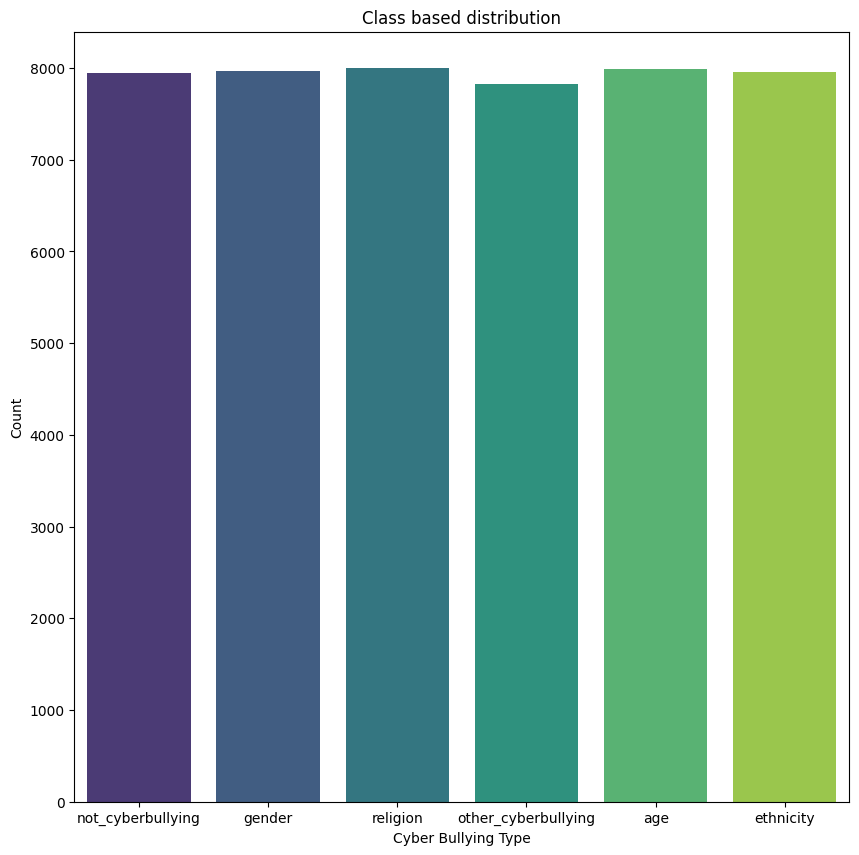

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(df, x='cyberbullying_type', palette='viridis')
plt.title('Class based distribution')
plt.xlabel('Cyber Bullying Type')
plt.ylabel('Count')
plt.show()

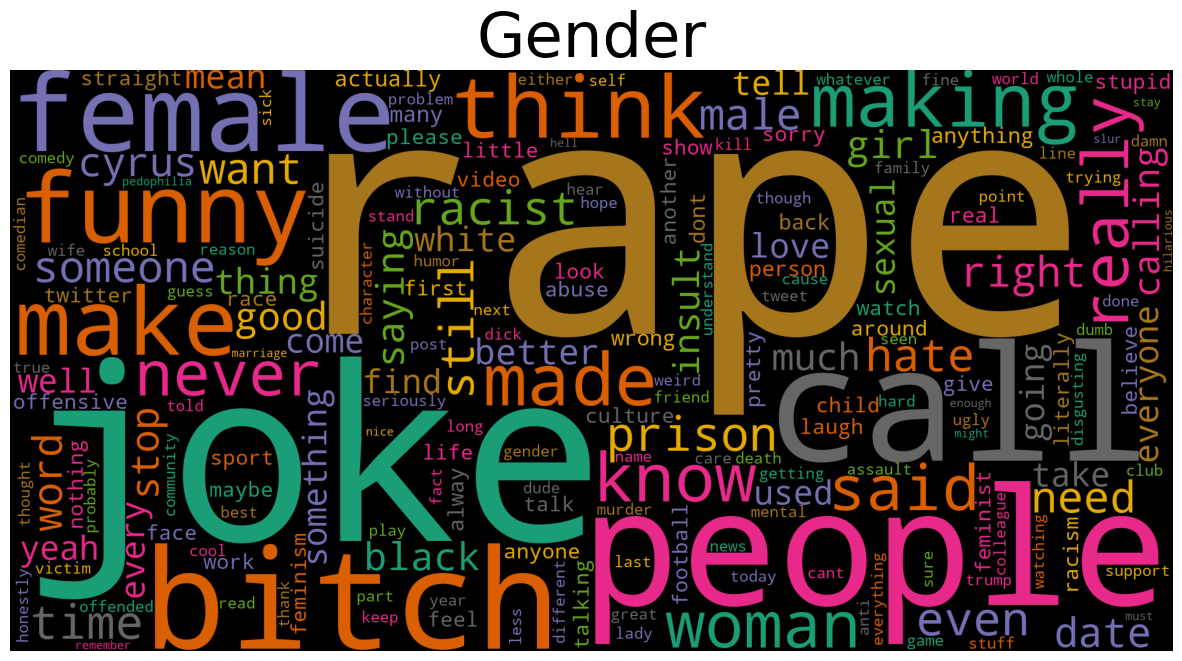

In [26]:
# Gender Based hate on Twitter (Word cloud)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15,10))

gender = df[df['cyberbullying_type'] == 'gender']
text_gender = gender.tweet_text.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title('Gender', fontsize=45)
plt.imshow(cloud1)

In [27]:
# Most used words and phrases for gender based hate

unigrams = get_top_n_gram(text_gender,(1,1),10)
bigrams = get_top_n_gram(text_gender,(2,2),10)



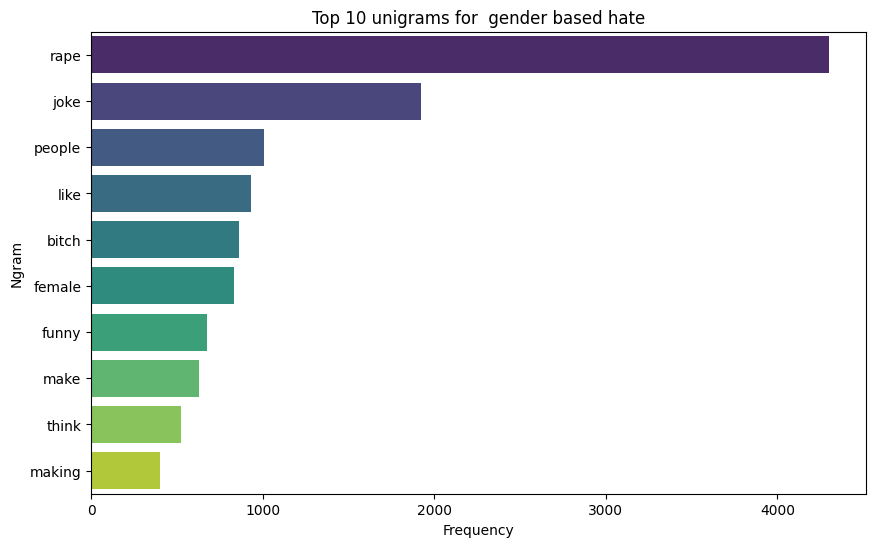

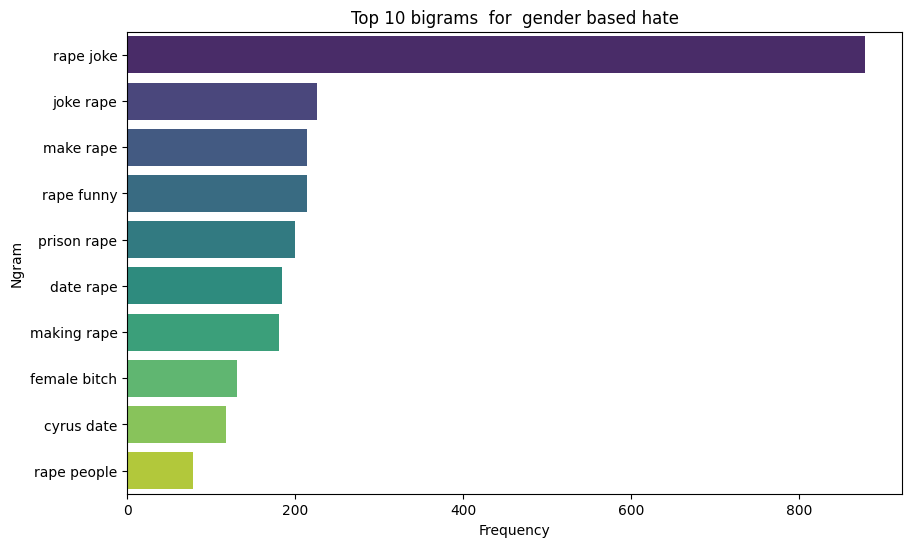

In [28]:
# Most used words and phrases for gender based hate
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_ngrams(ngrams, title="Top N-grams"):
    ngrams_df = pd.DataFrame(ngrams, columns=['Ngram', 'Frequency'])
    
    # Plot the N-grams as a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Ngram', data=ngrams_df, palette='viridis')
    
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Ngram')
    plt.show()

plot_top_ngrams(unigrams, 'Top 10 unigrams for  gender based hate')
plot_top_ngrams(bigrams, 'Top 10 bigrams  for  gender based hate')


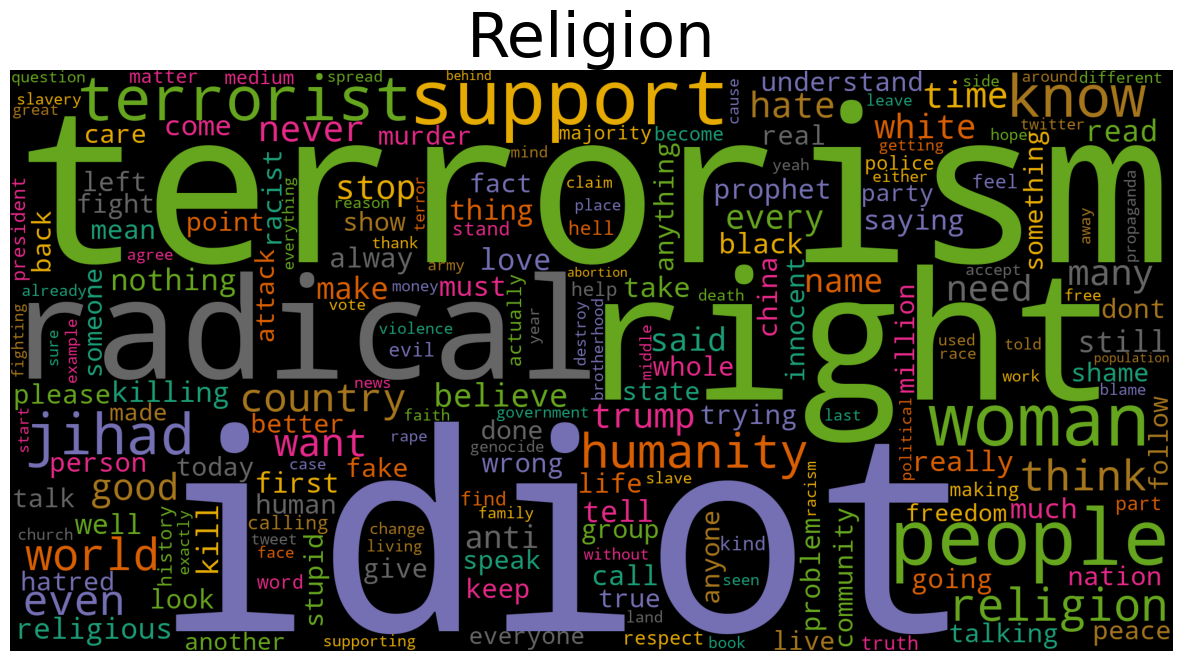

In [29]:
#  Religion Based hate on Twitter (Word cloud)
from wordcloud import WordCloud

plt.figure(figsize=(15,10))

religion = df[df['cyberbullying_type'] == 'religion']
text_religion = religion.tweet_text.values
cloud2 = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))
plt.axis('off')
plt.title('Religion', fontsize=45)
plt.imshow(cloud2)

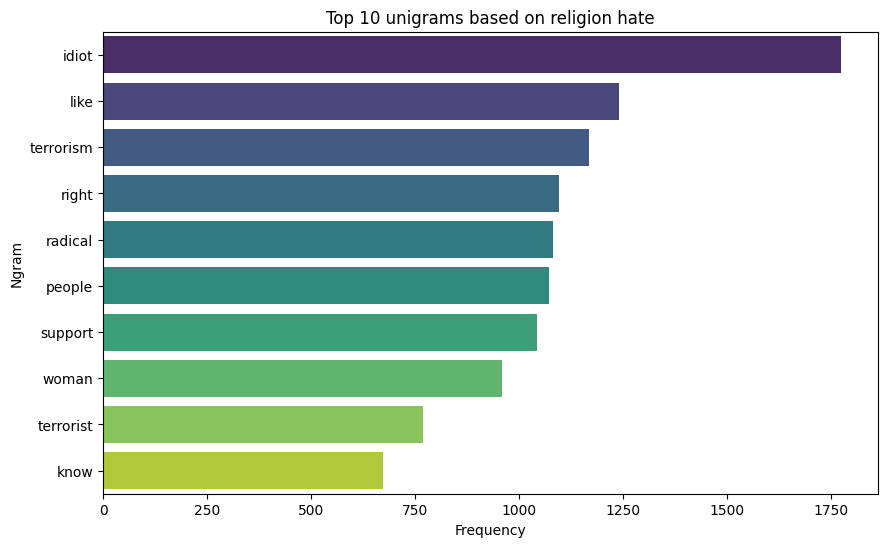

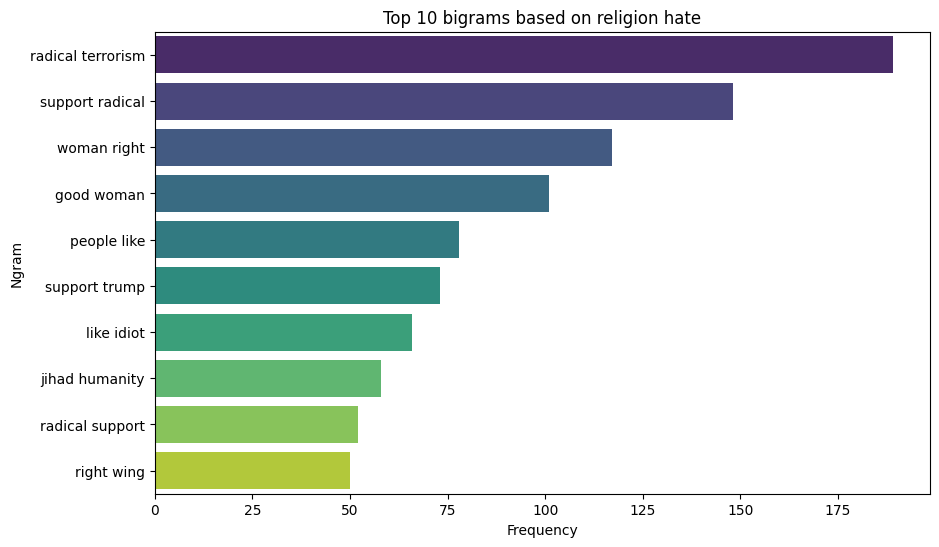

In [30]:
# Most used words and phrases for religion based hate

unigrams = get_top_n_gram(text_religion,(1,1),10)
bigrams = get_top_n_gram(text_religion,(2,2),10)

plot_top_ngrams(unigrams, 'Top 10 unigrams based on religion hate')
plot_top_ngrams(bigrams,  'Top 10 bigrams based on religion hate')



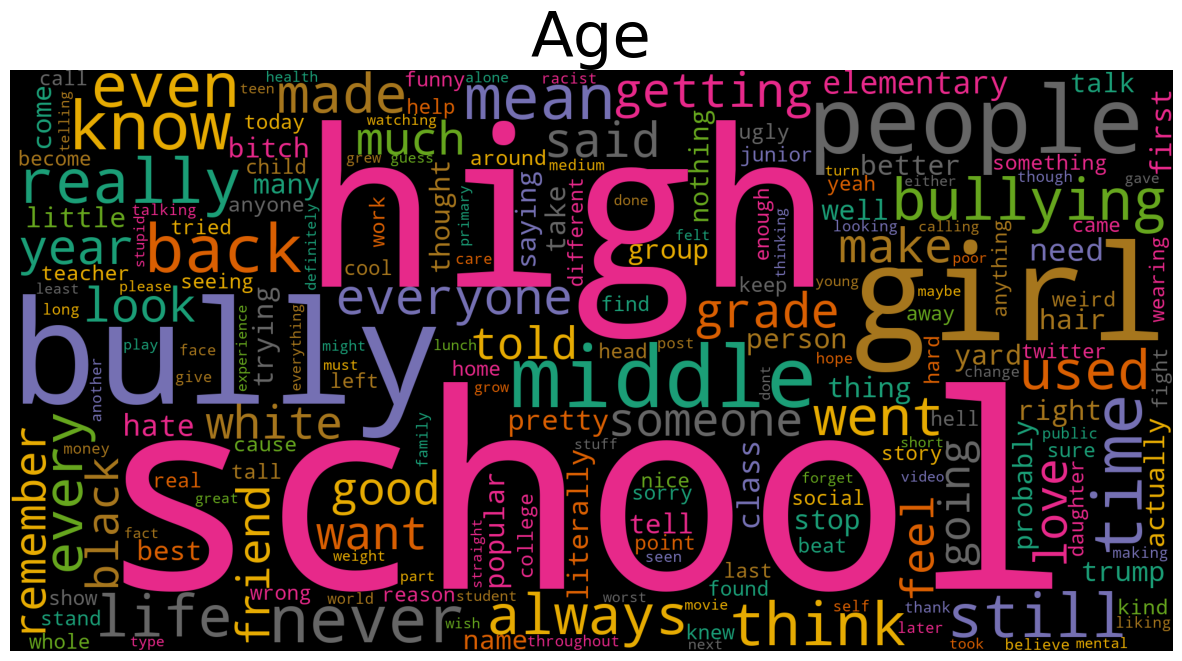

In [31]:
# age based cyberbullying wordcloud
plt.figure(figsize=(15,10))

age = df[df['cyberbullying_type'] == 'age']
text_age = age.tweet_text.values
cloud3 = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))
plt.axis('off')
plt.title('Age', fontsize=45)
plt.imshow(cloud3)

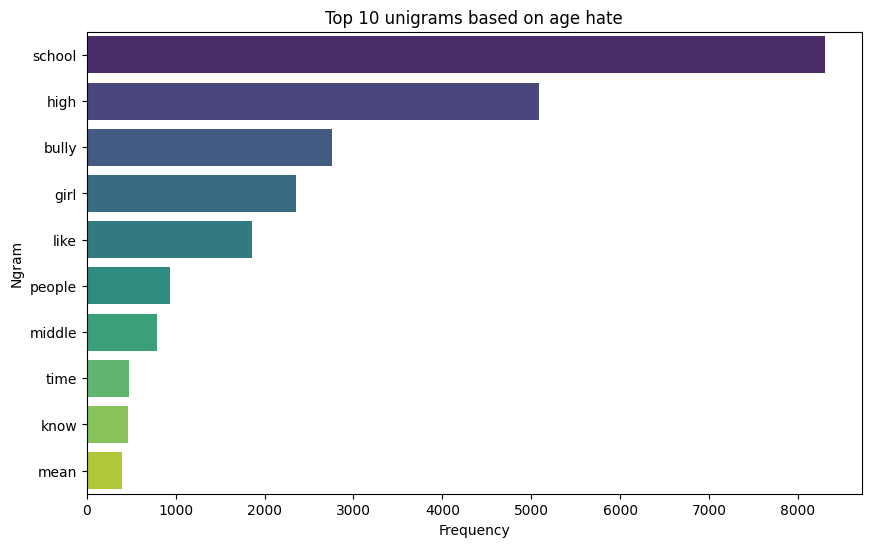

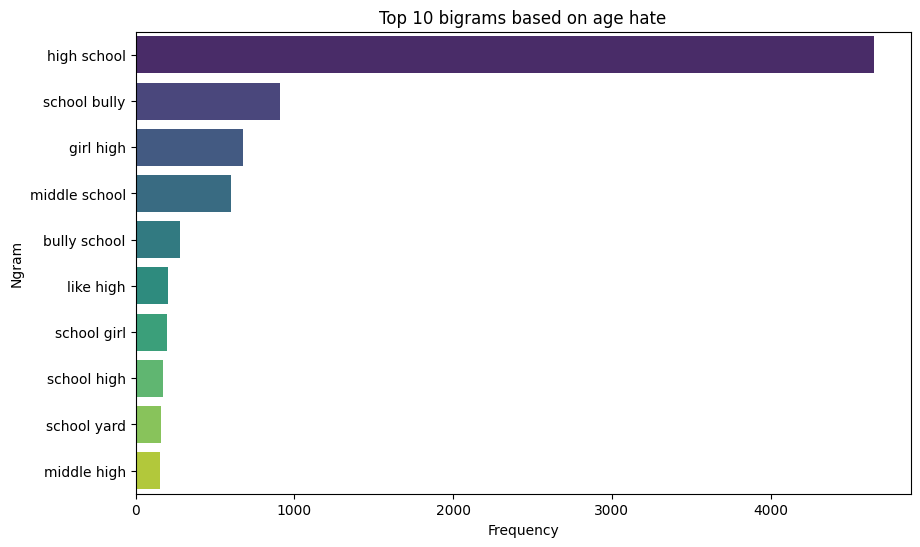

In [32]:
# most used words and phrases for age related cyberbullying
unigrams = get_top_n_gram(text_age,(1,1),10)
bigrams = get_top_n_gram(text_age,(2,2),10)

plot_top_ngrams(unigrams, 'Top 10 unigrams based on age hate')
plot_top_ngrams(bigrams,  'Top 10 bigrams based on age hate')


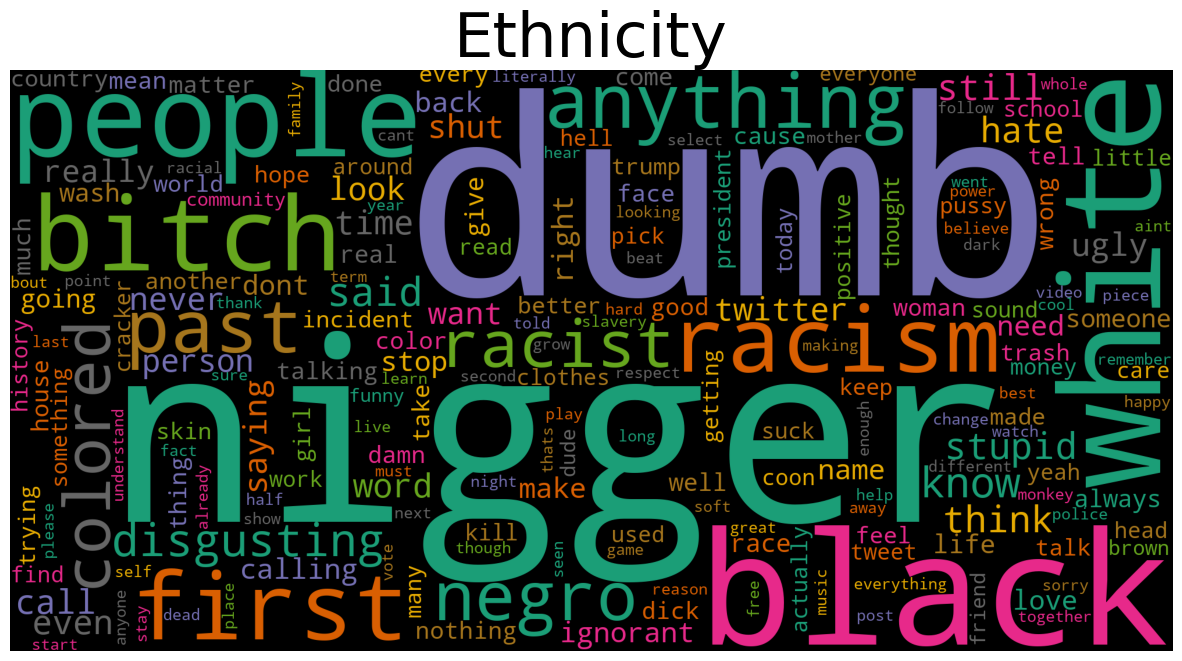

In [33]:
# ethnicity based cyber bullying wordcloud

plt.figure(figsize=(15,10))

ethnicity = df[df['cyberbullying_type'] == 'ethnicity']
text_ethnicity = ethnicity.tweet_text.values
cloud4 = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))
plt.axis('off')
plt.title('Ethnicity', fontsize=45)
plt.imshow(cloud4)

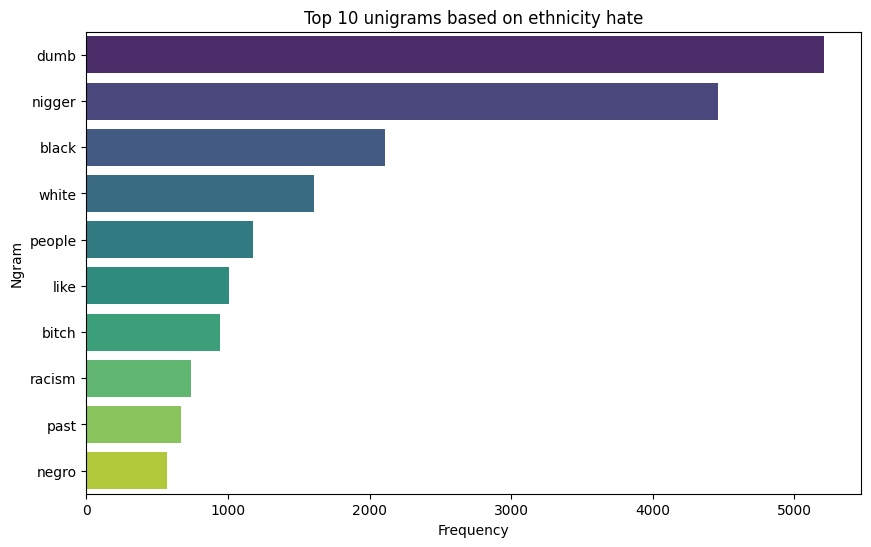

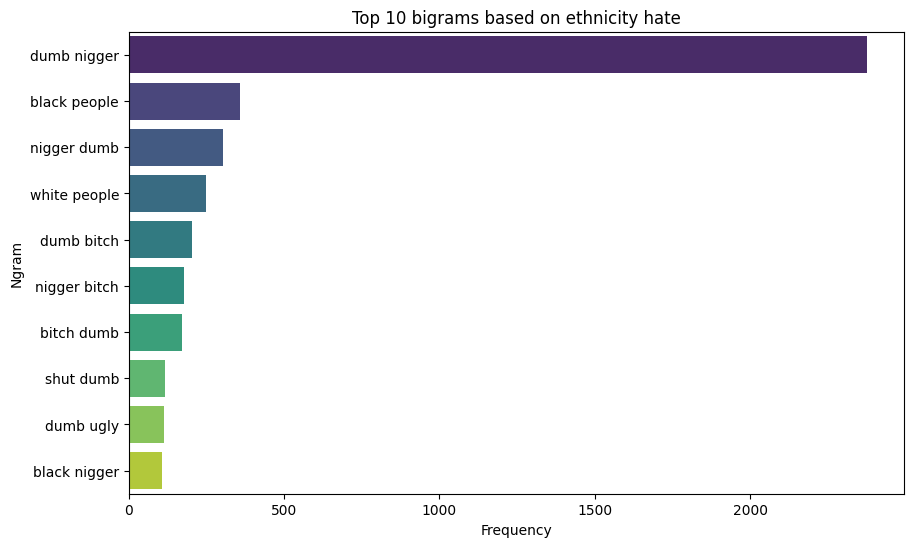

In [34]:
# most used words and phrases for ethnicity related cyberbullying
unigrams = get_top_n_gram(text_ethnicity,(1,1),10)
bigrams = get_top_n_gram(text_ethnicity,(2,2),10)

plot_top_ngrams(unigrams, 'Top 10 unigrams based on ethnicity hate')
plot_top_ngrams(bigrams,  'Top 10 bigrams based on ethnicity hate')


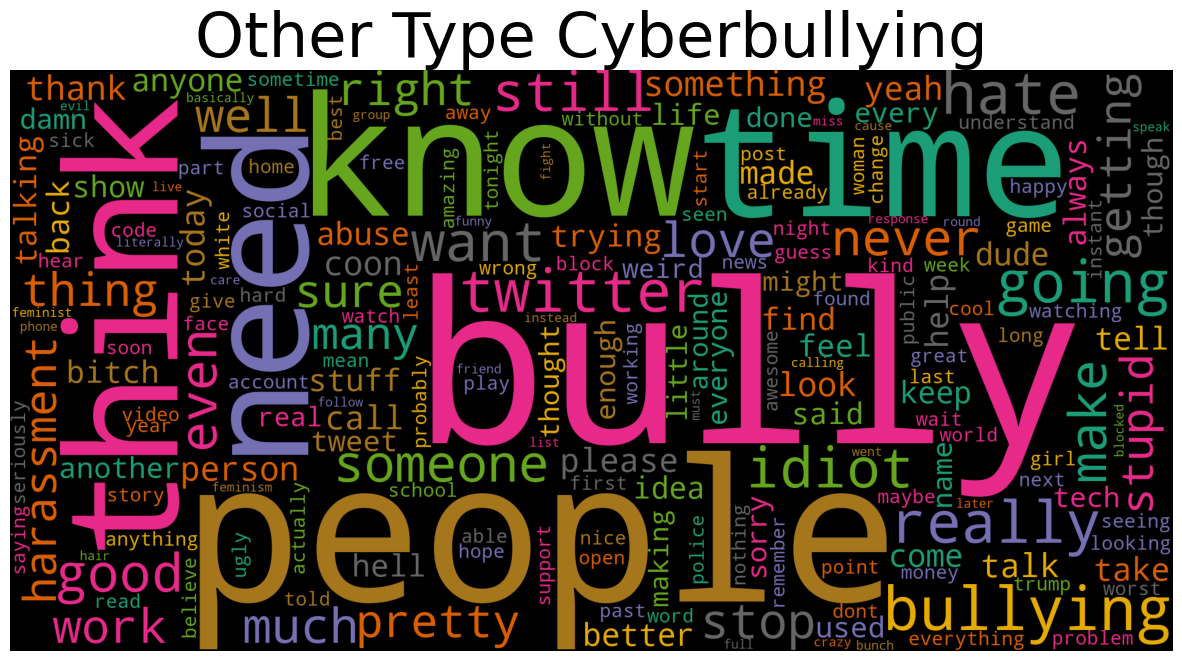

In [35]:
# word cloud for other type cyberbullying
# ethnicity based cyber bullying wordcloud

plt.figure(figsize=(15,10))

others = df[df['cyberbullying_type'] == 'other_cyberbullying']
text_others = others.tweet_text.values
cloud5 = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_others))
plt.axis('off')
plt.title('Other Type Cyberbullying', fontsize=45)
plt.imshow(cloud5)


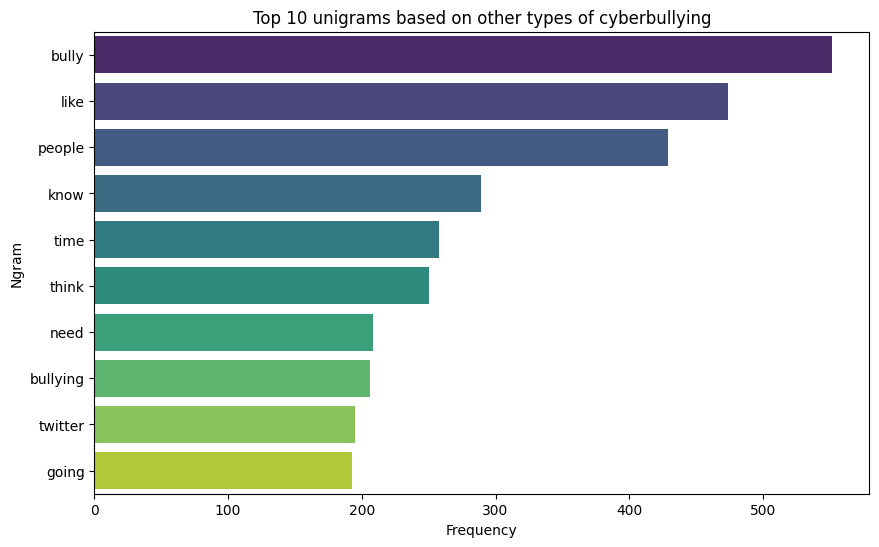

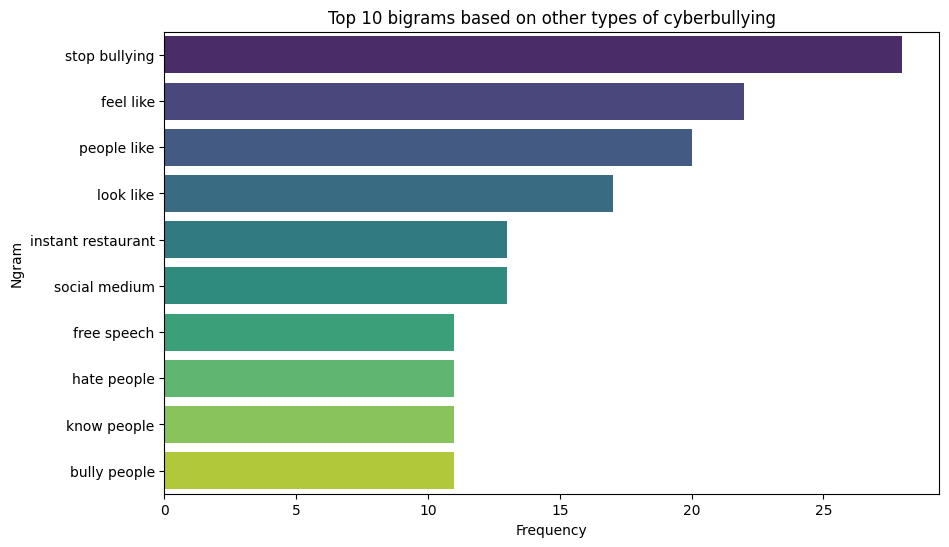

In [36]:
unigrams = get_top_n_gram(text_others,(1,1),10)
bigrams = get_top_n_gram(text_others,(2,2),10)

plot_top_ngrams(unigrams, 'Top 10 unigrams based on other types of cyberbullying')
plot_top_ngrams(bigrams,  'Top 10 bigrams based on other types of cyberbullying')


## Model Training & Evaluation Report

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [28]:
# train test split in 80:10:10 ratio 
X_train, X_temp, y_train, y_temp = train_test_split(df['tweet_text'], df['cyberbullying_type'], test_size=0.2, random_state=30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=30)


In [29]:
# Label encoding all the 6 classes present in our target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


In [30]:
# TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)


In [31]:
# Function for training all our models
def train_model(model, param_grid, X_train, y_train, X_val, y_val):
    pipeline = make_pipeline(tfidf_vectorizer, model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Validating the model using validation set
    val_score = grid_search.score(X_val, y_val)
    print(f"Validation score: {val_score:.4f}")

    return grid_search

In [32]:
# defining our models and their param grid
models = {
    'Naive Bayes': (
        MultinomialNB(),
        {'multinomialnb__alpha': [0.1, 0.5, 1.0]}
    ),
    'SVM': (
        SVC(),
        {
            'svc__kernel': ['linear', 'rbf'],
            'svc__C': [1, 10, 100],
            'svc__gamma': ['scale', 'auto']
        }
    ),
    'Gradient Boosting': (
        GradientBoostingClassifier(random_state=30),
        {
            'gradientboostingclassifier__n_estimators': [100, 200],
            'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
            'gradientboostingclassifier__max_depth': [3, 5, 7]
        }
    )
}

In [33]:
predictions = {}

# Train and evaluate models
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}....")
    trained_model = train_model(model, param_grid, X_train, y_train_encoded, X_val, y_val_encoded)
    y_pred = trained_model.predict(X_test)
    predictions[model_name] = label_encoder.inverse_transform(y_pred)
    print(f'{model_name} trained and prediction made.')

Training Naive Bayes....
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'multinomialnb__alpha': 1.0}
Best cross-validation score: 0.6615731651247335
Validation score: 0.6651
Naive Bayes trained and prediction made.
Training SVM....
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation score: 0.7435325969999242
Validation score: 0.7482
SVM trained and prediction made.
Training Gradient Boosting....
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}
Best cross-validation score: 0.7399155235774337
Validation score: 0.7436
Gradient Boosting trained and prediction made.


Model: Naive Bayes
Accuracy: 0.6545
Classification Report:
                     precision    recall  f1-score   support

                age       0.77      0.90      0.83       797
          ethnicity       0.64      0.90      0.75       757
             gender       0.78      0.66      0.71       835
  not_cyberbullying       0.47      0.31      0.38       766
other_cyberbullying       0.43      0.37      0.40       786
           religion       0.72      0.79      0.75       829

           accuracy                           0.65      4770
          macro avg       0.64      0.65      0.64      4770
       weighted avg       0.64      0.65      0.64      4770



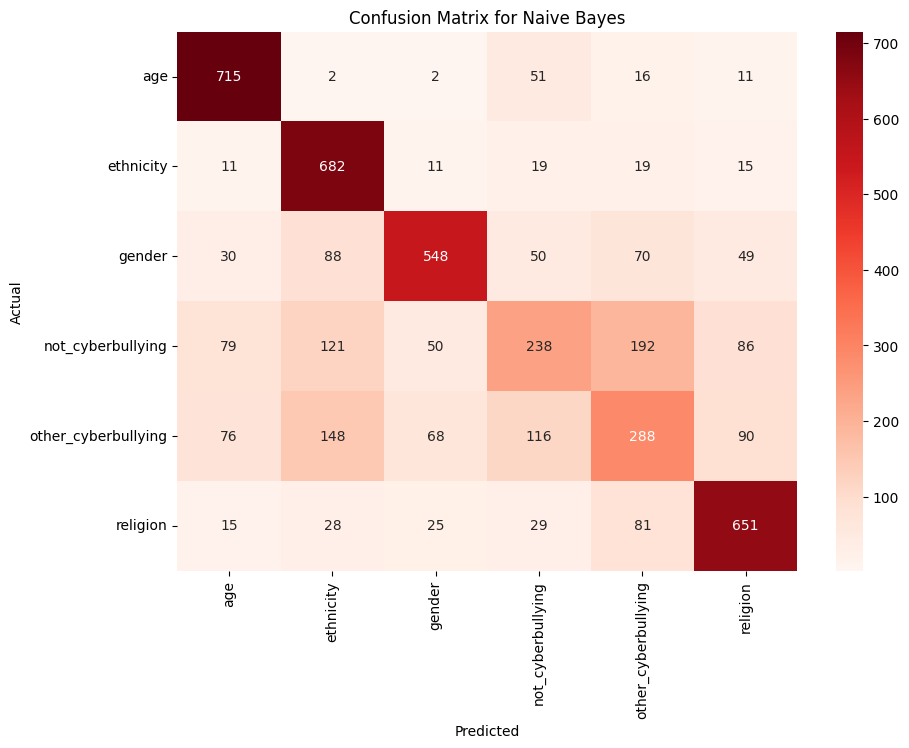

Model: SVM
Accuracy: 0.7273
Classification Report:
                     precision    recall  f1-score   support

                age       0.93      0.95      0.94       797
          ethnicity       0.95      0.97      0.96       757
             gender       0.87      0.69      0.77       835
  not_cyberbullying       0.43      0.37      0.40       766
other_cyberbullying       0.41      0.57      0.48       786
           religion       0.85      0.81      0.83       829

           accuracy                           0.73      4770
          macro avg       0.74      0.73      0.73      4770
       weighted avg       0.74      0.73      0.73      4770



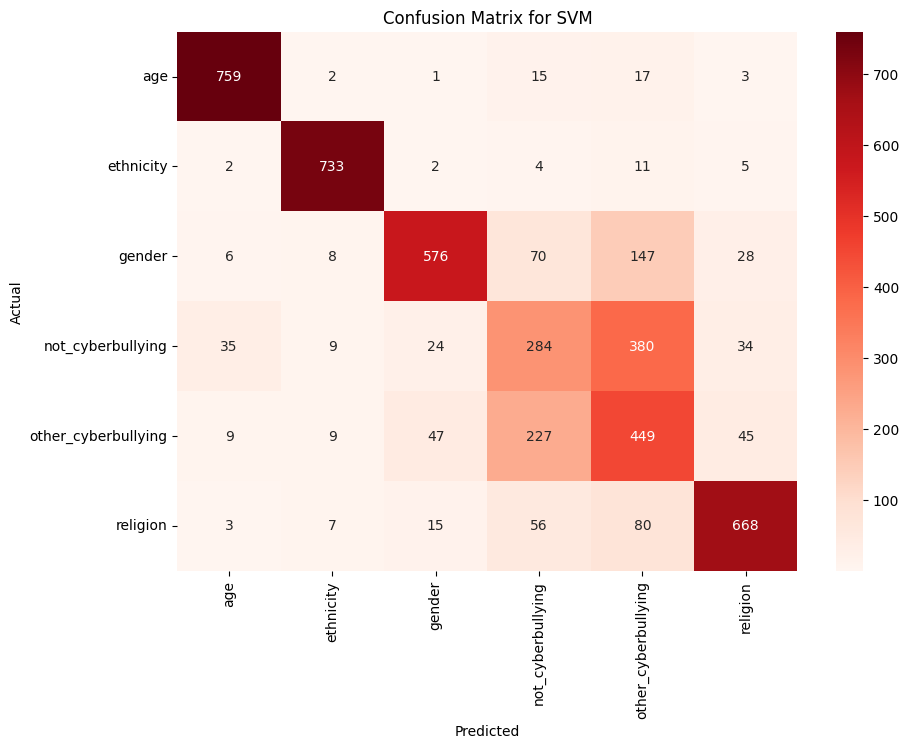

Model: Gradient Boosting
Accuracy: 0.7306
Classification Report:
                     precision    recall  f1-score   support

                age       0.92      0.96      0.94       797
          ethnicity       0.96      0.97      0.97       757
             gender       0.89      0.68      0.77       835
  not_cyberbullying       0.52      0.29      0.37       766
other_cyberbullying       0.41      0.74      0.52       786
           religion       0.90      0.74      0.81       829

           accuracy                           0.73      4770
          macro avg       0.77      0.73      0.73      4770
       weighted avg       0.77      0.73      0.73      4770



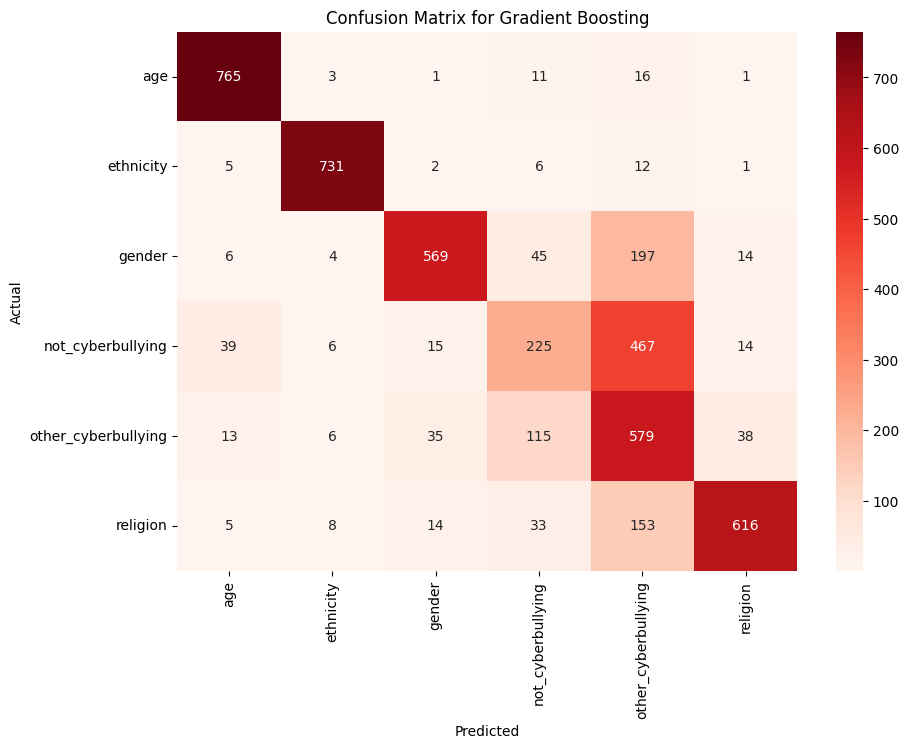

In [35]:
# final evaluation report of our all models with their confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
results = {}
for model_name, y_pred in predictions.items():

    accuracy = accuracy_score(y_test, y_pred)

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [36]:
# choosing the best model from our predictions
best_model = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model]['accuracy']

print(f"The best model is: {best_model} with an accuracy of {best_accuracy:.4f}.")

The best model is: Gradient Boosting with an accuracy of 0.7306.


In [40]:
# plotting and comparing the accuracies of all the models we used.
import plotly.express as px

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

fig = px.bar(accuracy_df, x='Model', y='Accuracy', 
             title='Model Accuracy Comparison', 
             labels={'Model': 'Models', 'Accuracy': 'Accuracy'}, 
             text='Accuracy', 
             color='Accuracy', 
             color_continuous_scale='viridis')

fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.update_xaxes(tickangle=45)

fig.show()

## Documentation

## 1. Data Preparation :-
### Loading Data :
**->** Read twitter data from CSV files got from DataSet Link given below. A complete description of dataset is given in the link below

Dataset Link :- https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

<hr>

## 2. Data Preprocessing :-
**->** Converted the tweet text to lower case.

**->** Removed all the noise (punctuations, numbers, special characters, hyperlinks, urls, emojis) from the tweet text.

**->** Then the text is lemmantized and only those words were kept in text which were english.

**->** A function is defined to get top unigrams and bigrams of the text according to cyberbullying type.


<hr>

## 3. Visualization :-
1.  A bar chart is plotted to show the top 10 unigrams and bigrams of each cyberbullying type.
2.  A word cloud is plotted to show the top word used for each cyberbullying type.


<hr>

## 4. Training / Testing / Splitting & Define Basic How Model Work :-
1. Splitting Our data in 80:10:10 (Train Data : Validation Data : Test Data)
2. Label encoding all the 6 classes present in our target variable.
3. Term Frequency-Inverse Document Frequency Vectorizer with maximum 1000 features.
4. Make A pipeline.
5. Use GridSearch Cross Validation for feature selections.
6. Train 3 different models and fit on training data.
7. After model run over test data and check accuracy score based on different matrics.

<hr>

## 5. Model Training & Psuedocode :-

**1. Naive bayes model :-**

  **Psuedocode:-**

Input: X (features), Y (labels), α (smoothing)
Train:
  - Compute P(Y=c) for each class c
  - For each feature f, class c, estimate P(X_f | Y=c) with smoothing
Predict:
  - For each class c, compute P(Y=c | X) = P(Y=c) * Π P(X_f | Y=c)
  - Return class with highest posterior



**2. SVM Model :-**
  
  **Psuedocode:-**

Input: X (features), Y (labels), C (regularization), K (kernel)
Train:
  - Initialize α_i = 0
  - While not converged:
    - For each i, compute decision function f(X_i) = Σ α_j Y_j K(X_j, X_i) + b
    - Update α_i and α_j using optimization
  - Compute bias b from support vectors
Predict:
  - For X, compute f(X) = Σ α_j Y_j K(X_j, X) + b
  - Return sign(f(X))



**3. Gradient Boosting Model (Ensamble Method) :-**

  **Psuedocode:-**
  
Input: X (features), Y (labels), T (iterations), η (learning rate)
Train:
  - Initialize F_0(X) = log(P(Y=1) / P(Y=0))
  - For t = 1 to T:
    - Compute residuals r_i = Y_i - P(Y_i | X_i)
    - Fit weak learner h_t(X) to residuals
    - Update model F_{t+1}(X) = F_t(X) + η h_t(X)
Predict:
  - Compute F_T(X) = F_0(X) + Σ η h_t(X)
  - Return 1 if P(Y=1 | X) > 0.5, else 0

<hr>

## 6. Contributions / Novelty :-
**->**  This project addresses cyberbullying detection on Twitter using a multi-model approach, applying Naive Bayes, Support Vector Machines (SVM), and Gradient Boosting ensemble methods. After extensive preprocessing, including cleaning, tokenization, and transforming tweets using TF-IDF for text representation. These features help in identifying potential patterns of abusive behavior.

**->** Naive Bayes was used for its computational efficiency and simplicity, while SVM was chosen for its strong performance with high-dimensional data. Gradient Boosting, an ensemble method, was implemented to combine weak learners into a more powerful model, improving overall prediction accuracy. Each model was rigorously evaluated using metrics such as accuracy, precision, recall, and F1-score.

**->** The novelty of this approach lies in the combination of traditional text classification models with advanced ensemble methods, along with the incorporation of social behavior features that go beyond simple text analysis. By comparing the models, we identified the strengths and limitations of each in the context of cyberbullying detection. This comprehensive, multi-dimensional approach offers a more accurate and nuanced understanding of online bullying behaviors, capturing subtle, complex forms of aggression like sarcasm or indirect insults.

<hr>

## 7. Citations :-

* For Dataset :- https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

* For Data Visulizations :-  https://matplotlib.org/ , https://seaborn.pydata.org,  https://plotly.com/


* For Dataset Training/Testing/Splitting :-  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* For GridSearch Feature Selections :-   https://scikit-learn.org/stable/modules/grid_search.html

* For Naive bayes Model :-  https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

* For SVM Model :-  https://medium.com/@57fdaditya/the-complete-guide-to-support-vector-machines-svms-with-intuition-78697c347200

* For Gradient Boosting Model :- https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm
